# LINEAR REGRESSION -  MINIPROYECTO

## FORMA 1 - GRADIENT DESCENT

El **descenso de gradiente** es un algoritmo de optimización que se utiliza para ajustar los parámetros de un modelo de regresión lineal. El objetivo es encontrar los valores de los parámetros que minimizan la función de costo, que mide la diferencia entre las predicciones del modelo y los valores reales.

El descenso de gradiente funciona iterativamente, actualizando los valores de los parámetros en cada iteración para reducir la función de costo. En cada iteración, se calcula el gradiente de la función de costo con respecto a los parámetros y se actualizan los parámetros en la dirección opuesta al gradiente. La tasa de aprendizaje controla el tamaño de los pasos que se dan en cada iteración.

Para aplicar el descenso de gradiente a un modelo de regresión lineal, se utiliza el **MSE** como función de costo. El MSE mide la diferencia entre las predicciones del modelo y los valores reales al cuadrado. El objetivo es minimizar el MSE ajustando los valores de los parámetros.


In [107]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
from IPython.display import Image, display


In [108]:
# Generamos X e Y (parecidos al ejemplo)
num_samples = 500
X = np.random.rand(num_samples) * 4 - 2 # Números aleatorios entre -2 y 2

# Relación lineal con ruido para Y
true_m = 3.0 # Pendiente aproximada de la imagen
true_c = 4.0 # Intersección aproximada de la imagen
y = true_m * X + true_c + np.random.randn(num_samples) * 2 # Añadir ruido


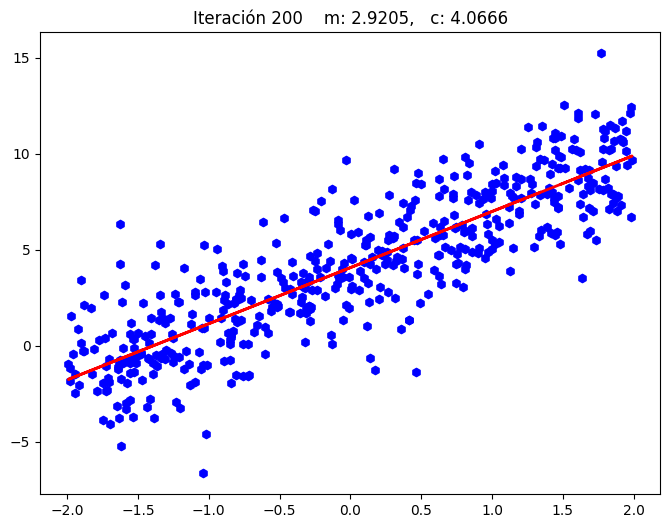

2.920541869328437
4.06659089817084


In [109]:

# Establecemos un Learning Rate y un número de muestras para las derivadas
learning_rate = 0.02
n = len(X)

# Calculamos la derivada del error respecto de m y c:for i in range(num_iteraciones):
m = 0
c = 0
for i in range(200):
    y_pred = m * X + c

    dm = (2/n) * np.sum((y - y_pred) * (-X))
    dc = (2/n) * np.sum((y - y_pred) * (-1))

    m = m - dm * learning_rate
    c = c - dc * learning_rate

    # Mostrar en pantalla los resultados
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', marker='h')
    plt.plot(X, m * X + c, color='red', linewidth=2) #Línea de regresión
    plt.title(f"Iteración {i+1}    m: {m:.4f},   c: {c:.4f}")
    clear_output(wait=True)
    plt.show()
    plt.close()
    
print(m)
print(c)

# FORMA 2 - ECUACION NORMAL

El modelo de Linear Regression es el unico que se puede resolver de forma analitica resolviendo una ecuacion sin necesidad de optimizar usando por ejemplo el descenso de gradiente. Para resolverlo se usa una ecuacion llamada ECUACION NORMAL.

LA FORMULA RESUELTA: https://interactivechaos.com/es/manual/tutorial-de-machine-learning/la-ecuacion-normal

Aplicamos con nuestros datos de `X` e ``y``, y calculamos directamente los parametros ``m`` y ``c`` mediante la ecuación normal ($W=(X^T X)^{-1} X^T y$.), un método directo para encontrar la línea de mejor ajuste.

In [ ]:
# Añadimos el valor 1 (término independiente) a cada una de las X 

X_1 = np.c_[np.ones((len(X), 1)), X]

best_W = np.linalg.inv(X_1.T.dot(X_1)).dot(X_1.T).dot(y) #Ecuación normal pasada a código
best_W

print(f"Los valores del vector W son: {best_W}")

Los valores del vector W son: [4.17835963 2.96042021]


# FORMA 3 - SKLEARN

Comprobamos los valores de coeficiente (m) y de intercepto (c) que nos dan los métodos ".coef_" y ".intercept_" mediante "LinearRegression" importado desde "sklear.linear_model".



In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

X = X.reshape(-1, 1) # Convierte X de (500,) a (500, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

lr.fit(X_train, y_train)

print(lr.coef_)
print(lr.intercept_)


[3.04936543]
4.078475975633623


# CIERRE

Observamos cómo los tres metodos nos dan valores para coeficiente (m) e intercepto (c) muy parecidos.

In [119]:
Variable = ["m","c"]
Descendicente_Gradiente = [2.96035, 4.17718]
Ecuacion_Normal = [2.96042, 4.17835]
Sklearn = [3.04936, 4.07847]

data = {"Variable":Variable,
    "Descendente_Gradiente": Descendicente_Gradiente,
    "Ecuacion_Normal": Ecuacion_Normal,
    "Sklearn": Sklearn}


df = pd.DataFrame(data)
df.style.hide(axis="index")


Variable,Descendente_Gradiente,Ecuacion_Normal,Sklearn
m,2.960350,2.960420,3.049360
c,4.177180,4.178350,4.078470


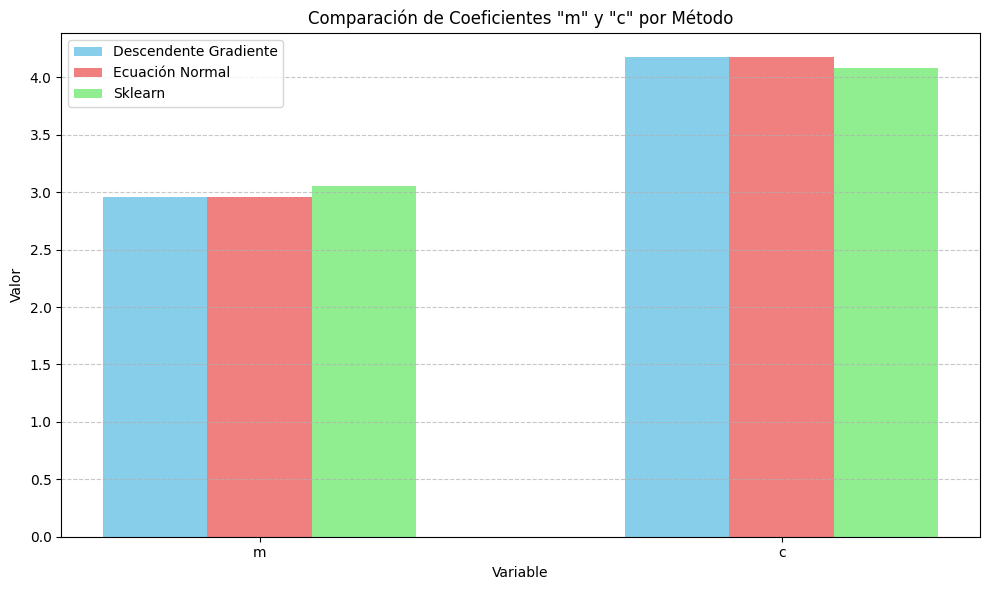

In [ ]:
plt.figure(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(Variable)) # Posiciones en el eje X para las variables

plt.bar(index - bar_width, df['Descendente_Gradiente'], bar_width, label='Descendente Gradiente', color='skyblue')
plt.bar(index, df['Ecuacion_Normal'], bar_width, label='Ecuación Normal', color='lightcoral')
plt.bar(index + bar_width, df['Sklearn'], bar_width, label='Sklearn', color='lightgreen')

plt.xlabel('Variable')
plt.ylabel('Valor')
plt.title('Comparación de coeficientes "m" y "c" por Método')
plt.xticks(index, Variable) 
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula solo en el eje Y
plt.tight_layout() # Ajusta el diseño para evitar superposiciones
plt.show()


## Gif de las gráficas del apartado 1:

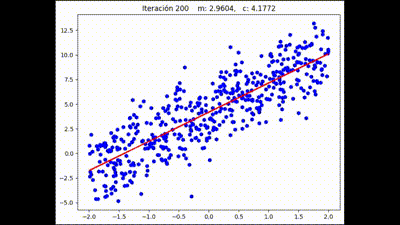

In [113]:
display(Image(filename='gif_mini_prct.gif'))
